In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
np.set_printoptions(suppress=True)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-trip-type-classification.zip (Unzipped Files)/train.csv.zip')

In [28]:
print('The number of samples {}'.format(data.shape))
data.head(5)


The number of samples (647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [29]:
print('The unique value of the data {}'.format(data[['VisitNumber']].nunique()))
print('The number of the value each VisitNumber: \n{}'.format(data['VisitNumber'].value_counts().sort_values(ascending = False).head(5)))

The unique value of the data VisitNumber    95674
dtype: int64
The number of the value each VisitNumber: 
VisitNumber
72439    209
88011    151
9181     113
60971    112
65792    111
Name: count, dtype: int64


In [30]:
data['TripType'].value_counts()


,count
TripType,
40,174164
39,95504
37,38954
38,29565
25,27609
7,23199
8,22844
36,21990
44,20424


[Text(0.5, 1.0, 'The Frequent of Trip Type'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Trip Type')]

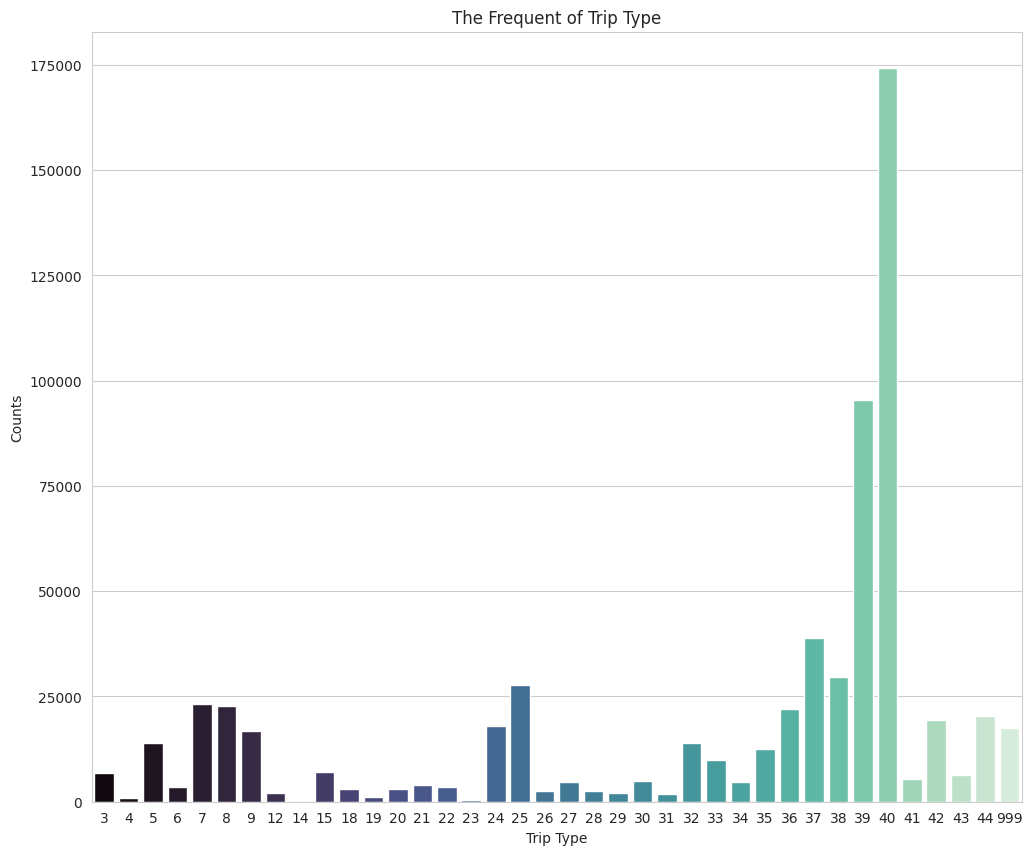

In [31]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax = sns.countplot(x = 'TripType', data = data, palette = 'mako')
ax.set(title = 'The Frequent of Trip Type', ylabel = 'Counts', xlabel = 'Trip Type')

[Text(0.5, 1.0, 'The Frequent of Weekday'),
 Text(23.999999999999986, 0.5, 'Counts'),
 Text(0.5, 24.0, 'Weekday')]

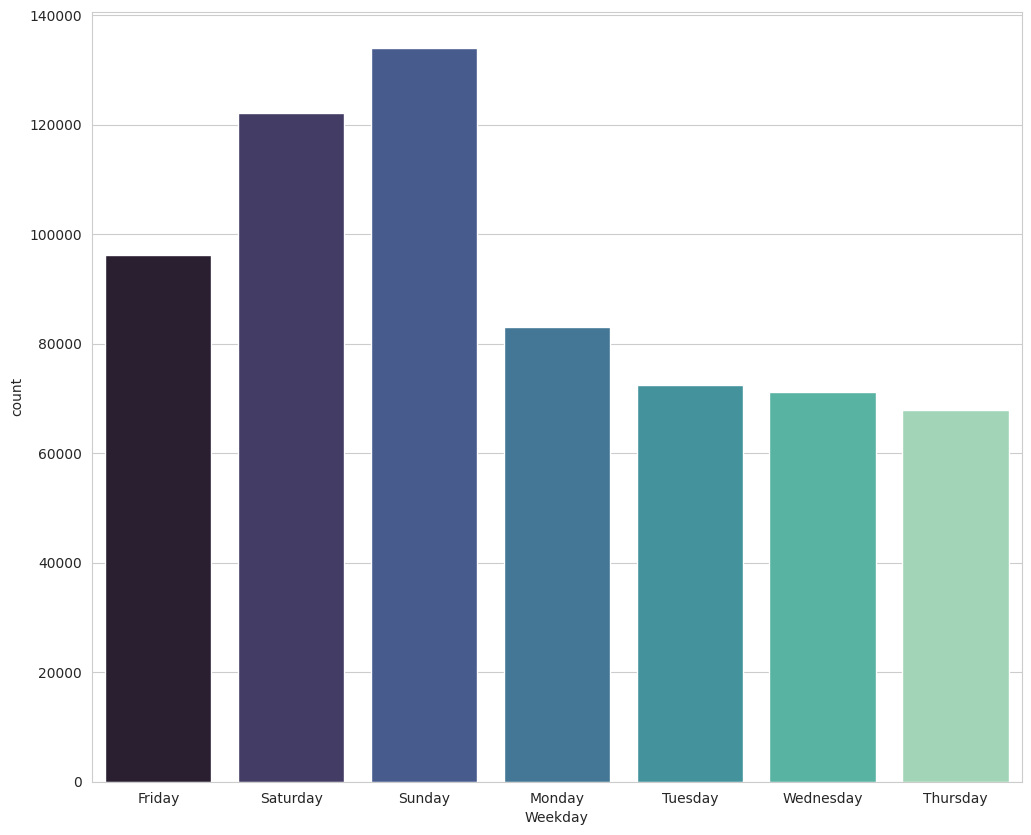

In [32]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'Weekday', data = data, palette = 'mako')
ax.set(title = 'The Frequent of Weekday', ylabel = 'Counts', xlabel = 'Weekday')

[Text(0.5, 1.0, 'The Frequent of Weekday'),
 Text(23.999999999999986, 0.5, 'Counts'),
 Text(0.5, 24.0, 'Weekday')]

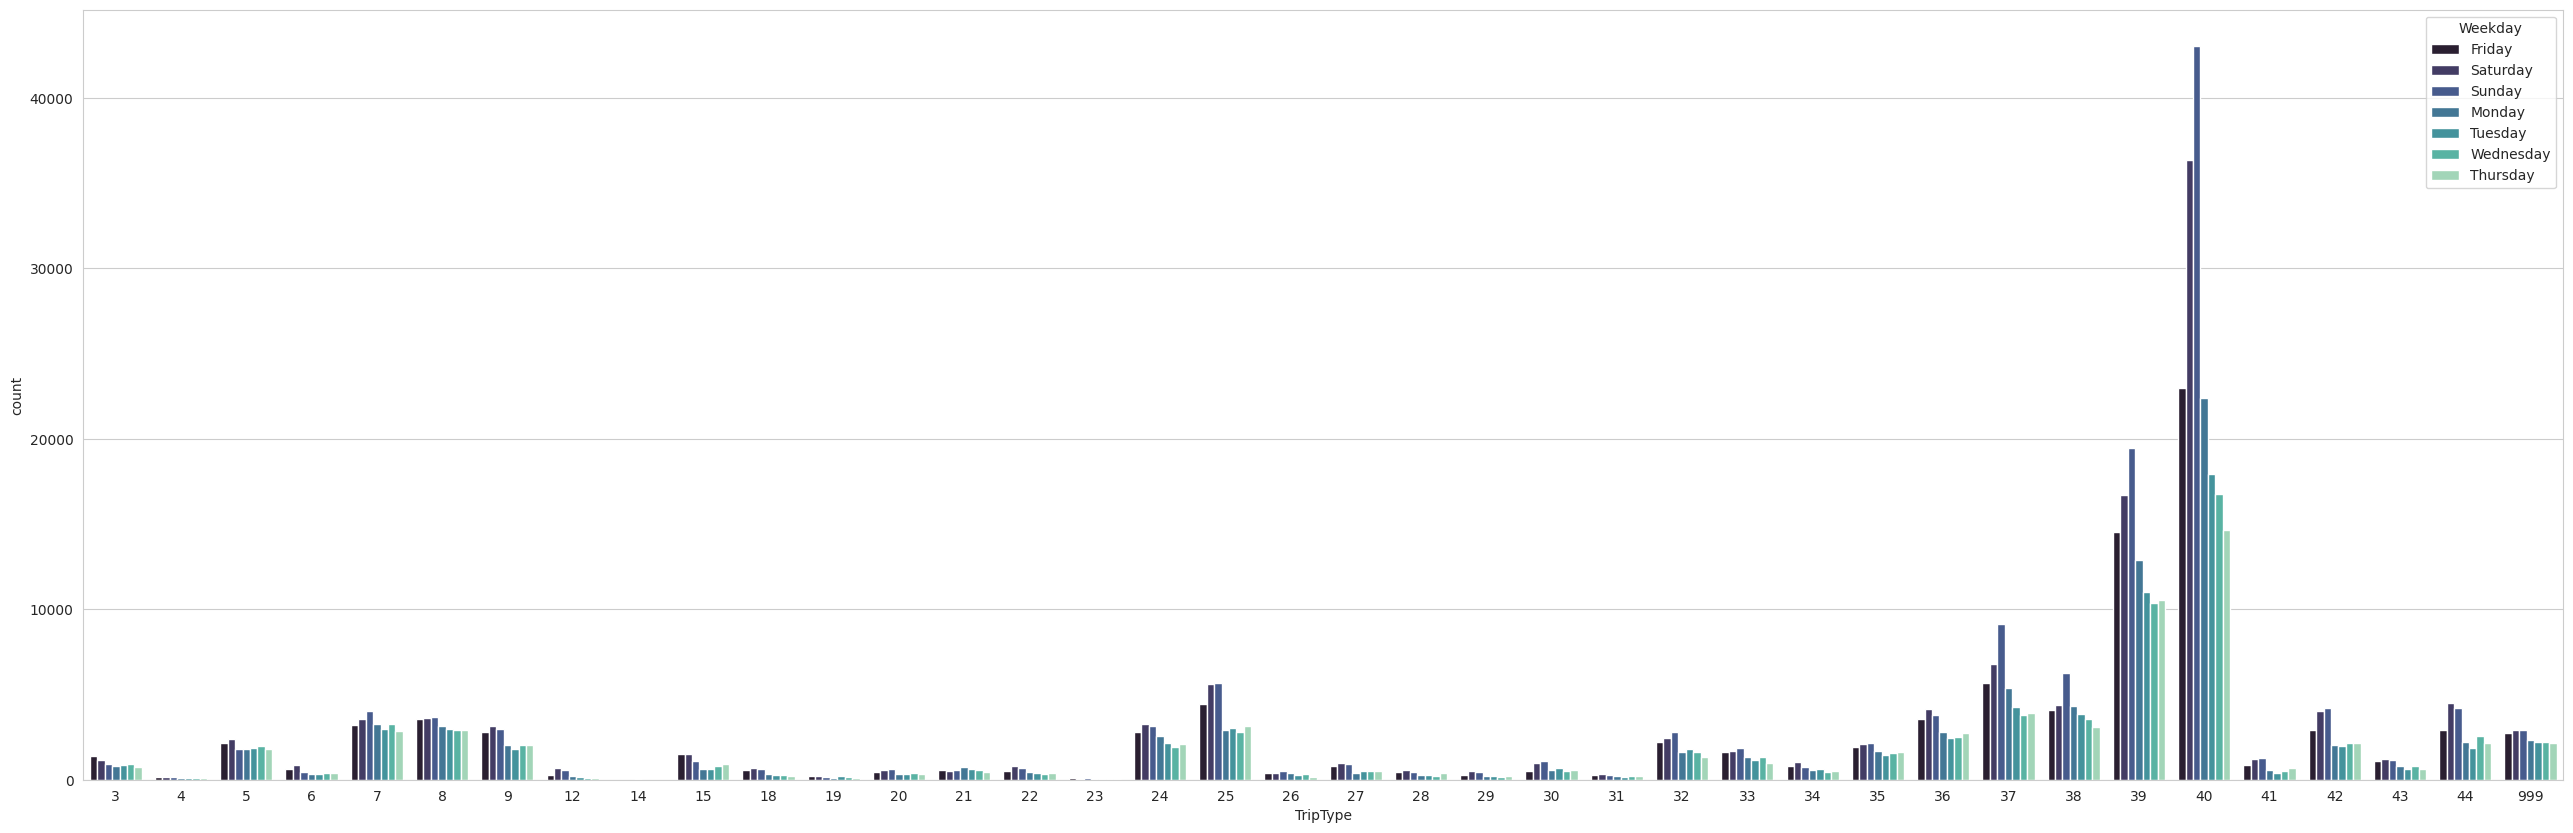

In [33]:
plt.figure(figsize = (32, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'TripType', hue = 'Weekday', data = data, palette = 'mako')
ax.set(title = 'The Frequent of Weekday', ylabel = 'Counts', xlabel = 'Weekday')

<Axes: xlabel='Weekday'>

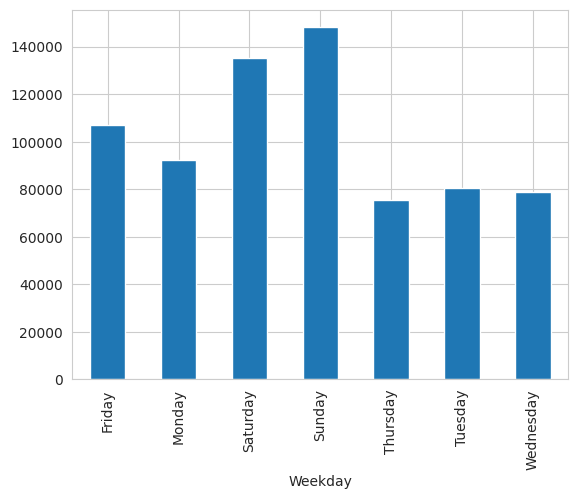

In [34]:
data.groupby(['Weekday'])['ScanCount'].sum().plot.bar()

In [35]:
print('The types of goods are {}'.format(data['DepartmentDescription'].nunique()))
data['DepartmentDescription'].unique()

The types of goods are 68


array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

Text(0.5, 1.0, 'The Frequent of Department Description')

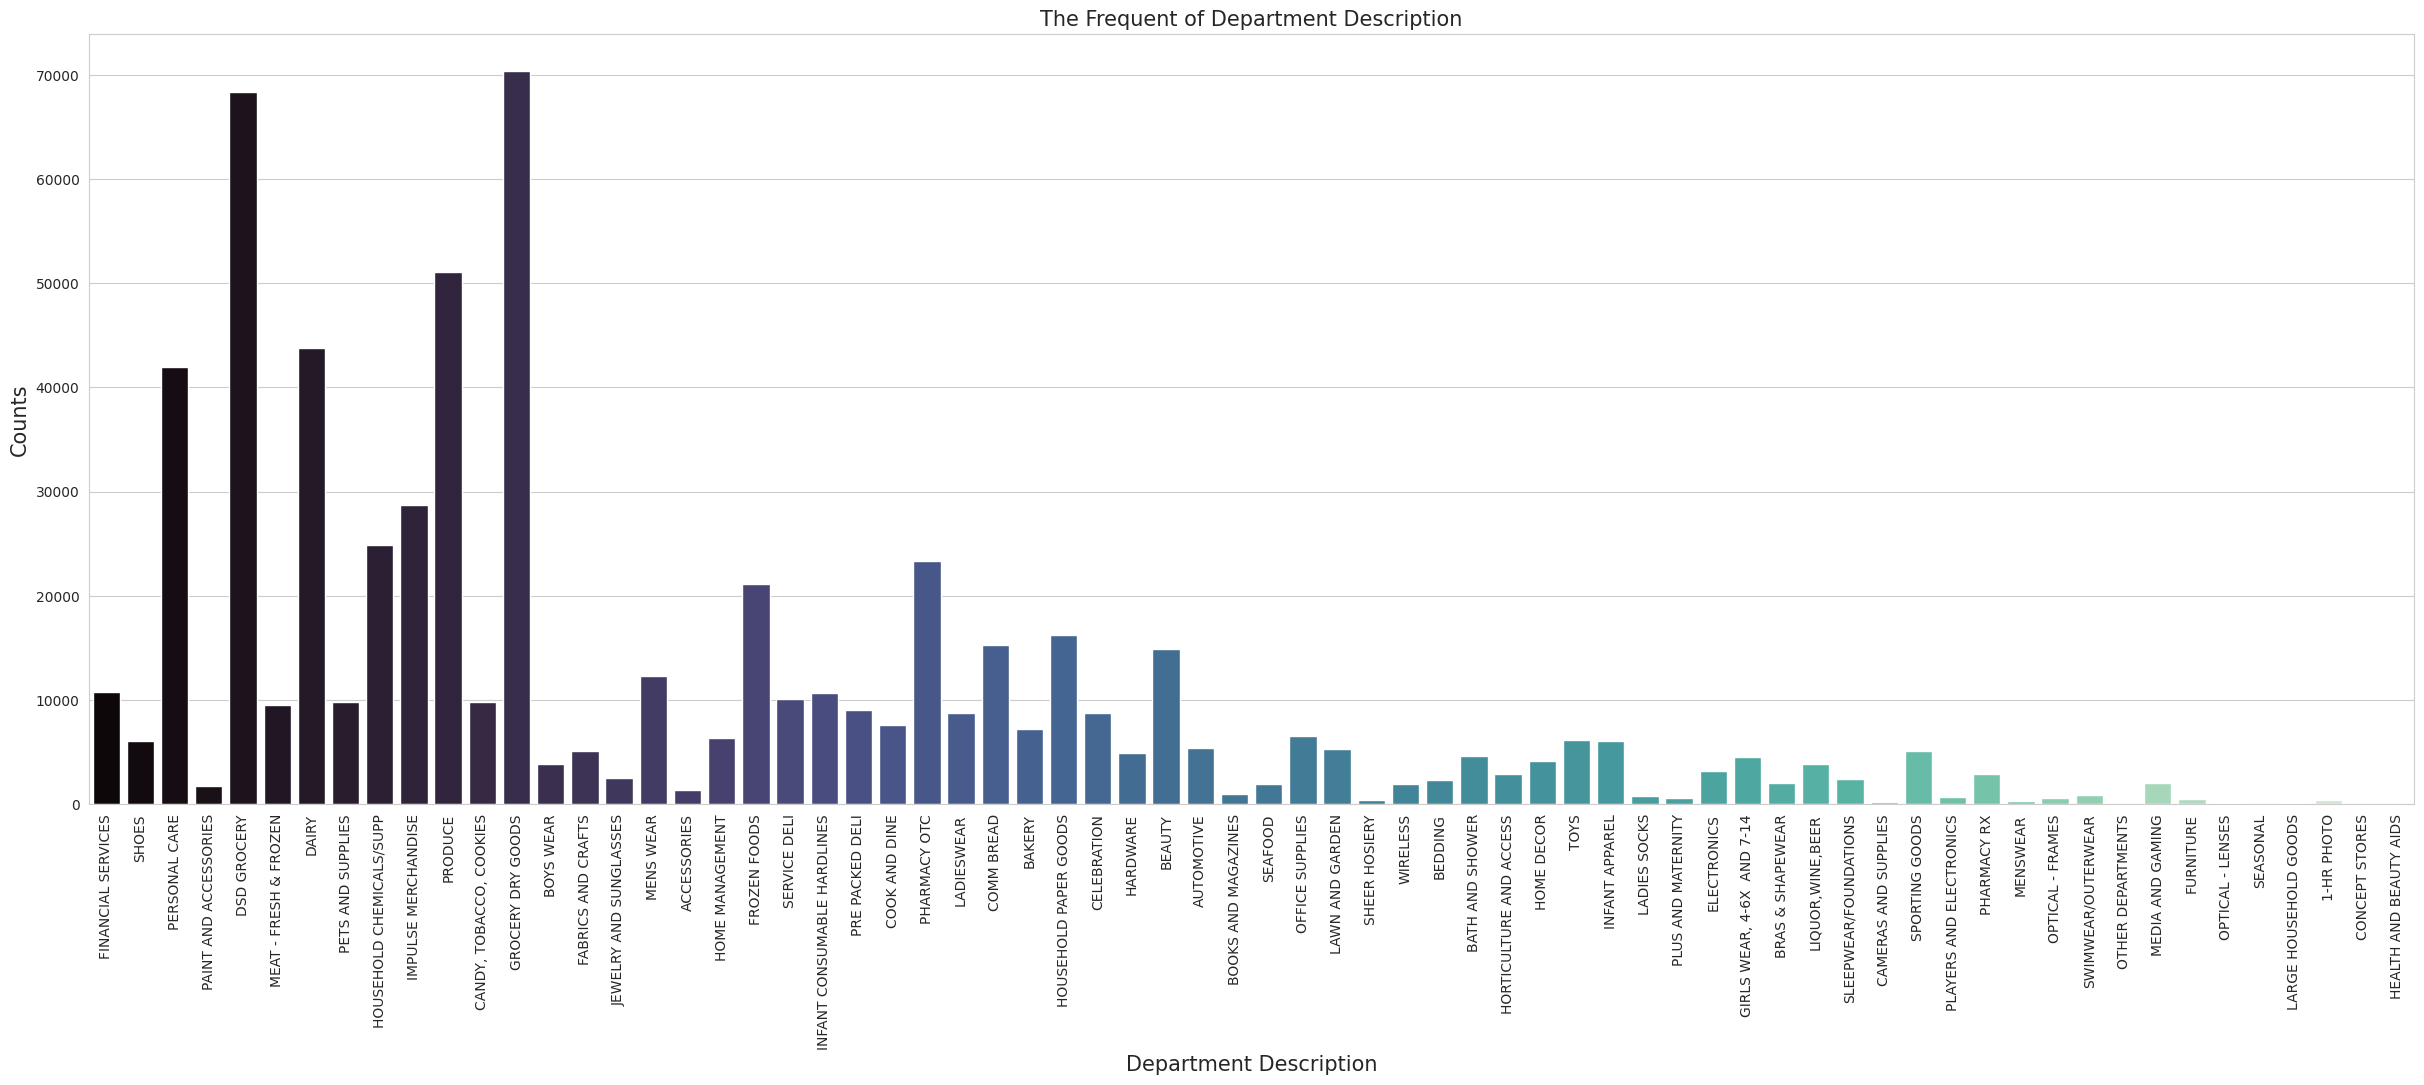

In [36]:
plt.figure(figsize = (30, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'DepartmentDescription', data = data, palette = 'mako')
plt.xticks(rotation = 90)
plt.xlabel('Department Description', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('The Frequent of Department Description', fontsize = 15)

In [37]:
data['DepartmentDescription'].value_counts()

,count
DepartmentDescription,
GROCERY DRY GOODS,70402
DSD GROCERY,68332
PRODUCE,51115
DAIRY,43820
PERSONAL CARE,41969
...,...
LARGE HOUSEHOLD GOODS,77
CONCEPT STORES,35
OTHER DEPARTMENTS,29


In [38]:
total = data.isnull().sum().sort_values(ascending = False)
print(total)
percentage = total / data.shape[0]
print('Percentage'.center(50, '-'))
print(percentage)
missingData = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
missingData

Upc                      4129
FinelineNumber           4129
DepartmentDescription    1361
Weekday                     0
VisitNumber                 0
TripType                    0
ScanCount                   0
dtype: int64
--------------------Percentage--------------------
Upc                      0.006381
FinelineNumber           0.006381
DepartmentDescription    0.002103
Weekday                  0.000000
VisitNumber              0.000000
TripType                 0.000000
ScanCount                0.000000
dtype: float64


,Total,Percentage
Upc,4129,0.006381
FinelineNumber,4129,0.006381
DepartmentDescription,1361,0.002103
Weekday,0,0.000000
VisitNumber,0,0.000000
TripType,0,0.000000
ScanCount,0,0.000000


In [39]:
data['Upc'].unique().tolist()[:10]

[68113152929.0,
 60538815980.0,
 7410811099.0,
 2238403510.0,
 2006613744.0,
 2006618783.0,
 2006613743.0,
 7004802737.0,
 2238495318.0,
 2238400200.0]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [41]:
data.select_dtypes(include = ["object"]).columns

Index(['Weekday', 'DepartmentDescription'], dtype='object')

In [42]:
def flot_to_str(obj):
    """
    Convert Upc code from float to string.
    Use this function by applying lambda
    Parameters: "Upc" column of DataFrame
    Return:string converted Upc removing dot
    """
    while obj != 'np.nan':
        obj = str(obj).split('.')[0]
        if len(obj) == 10:
            obj = obj + '0'
        elif len(obj) == 4:
            obj = obj + '0000000'
        return obj

In [43]:
def company(upcData):
    """
    Return company code from given Upc code.
    Parameters:'Upc' column of DataFrame
    Return: company code
    """
    try:
        code = upcData[: 6]
        if code == '000000':
            return x[-5]
        return code
    except:
        return -9999


In [44]:
def prodct(upcData):
    """
    Return company code from given Upc code.
    Parameters:'Upc' column of DataFrame
    Return: company code
    """
    try:
        code = upcData[6 :]
        return code
    except:
        return -9999

In [45]:
data['handled_Upc'] = data['Upc'].apply(flot_to_str)

In [46]:
data['company_code'] = data['handled_Upc'].apply(company)

In [47]:
data['product_code'] = data['handled_Upc'].apply(prodct)

In [48]:
data['DepartmentDescription'].nunique()

68

In [49]:
data.drop(['Upc'], axis = 1, inplace = True)

In [50]:
data.drop(['handled_Upc'], axis = 1, inplace = True)

In [51]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

dummy_data = pd.get_dummies(data[['Weekday']])

In [52]:
data = pd.concat([data, dummy_data], axis = 1)

In [53]:
print('The number of ScanCount {}'.format(data['ScanCount'].nunique()))
data['ScanCount'].unique()

The number of ScanCount 39


array([ -1,   1,   2,   3,   5,   6,   4,  14,  -2,   9,   7,  10,   8,
        -3,  -5,  11,  16,  -4,  13,  15,  30,  -6,  12,  20, -12,  19,
        46,  23,  -7,  22,  25,  24,  31,  -9,  51,  17,  18,  71, -10])

In [54]:
data['ScanCount'].value_counts().to_frame()


,count
ScanCount,
1,561489
2,53002
-1,14394
3,9445
4,4536
5,1380
6,866
-2,814
8,246


In [55]:
data['ScanCount_bool'] = 1
data.loc[data['ScanCount'] < 1, 'ScanCount_bool'] = 0
data['ScanCount_bool'].value_counts()

,count
ScanCount_bool,
1,631596
0,15458


In [56]:
data['temp_ScanCount'] = data['ScanCount']
data.loc[data['ScanCount'] < 0, 'temp_ScanCount'] = 0
data['number_ScanCount'] = pd.cut(data['temp_ScanCount'], 3, labels = ['low', 'median', 'high'])
concatData = pd.get_dummies(data['number_ScanCount'])
data = pd.concat([data, concatData], axis = 1)

In [57]:
data.drop(['temp_ScanCount', 'ScanCount_bool'], axis = 1, inplace = True)

In [58]:
data['number_ScanCount'].value_counts().to_frame()

,count
number_ScanCount,
low,647042
median,10
high,2


In [59]:
data['FinelineNumber'].value_counts().sort_values(ascending = False).to_frame()

,count
FinelineNumber,
5501.0,8244
1508.0,5121
135.0,4538
808.0,4401
0.0,3837
...,...
634.0,1
6458.0,1
3794.0,1


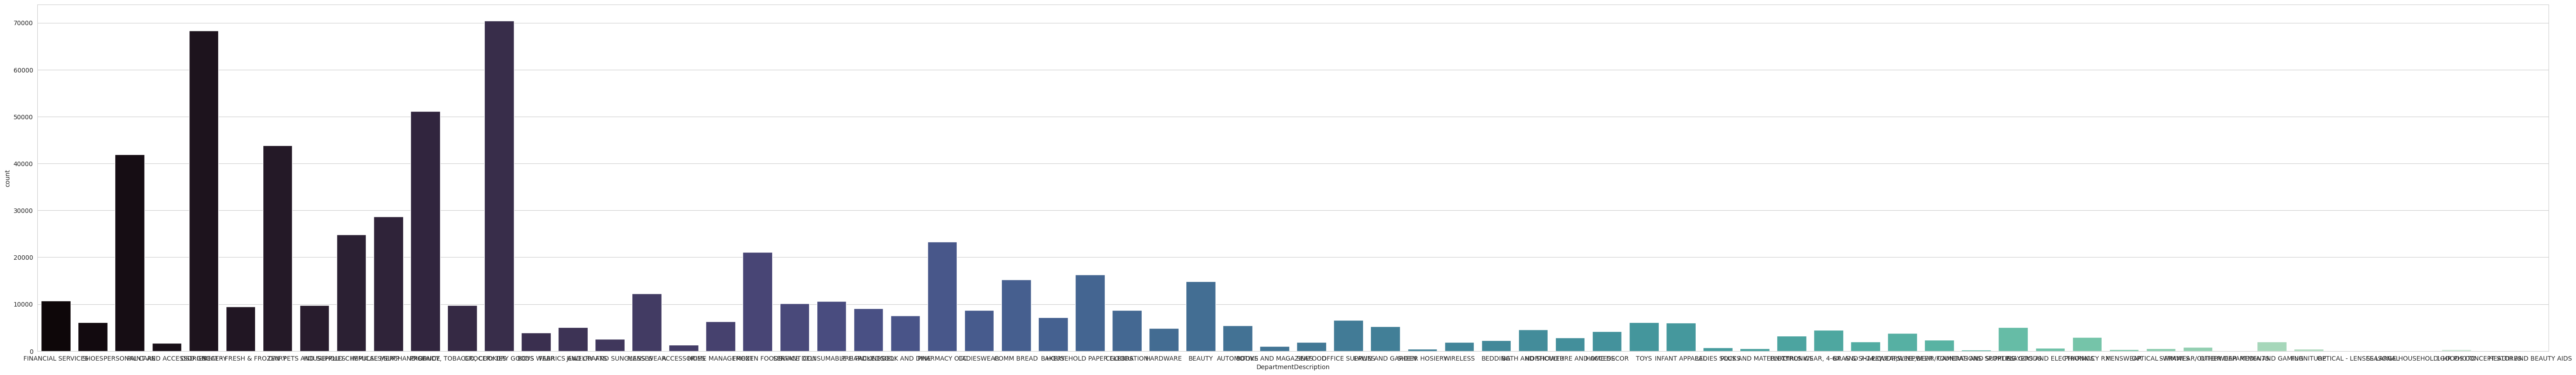

In [60]:
plt.figure(figsize = (72, 10))

sns.set_style('whitegrid')
ax2 = sns.countplot(x = 'DepartmentDescription', data = data, palette = 'mako')

plt.show()

[Text(0.5, 1.0, 'The Correlation with Weekday and TripTypes'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Trip Types')]

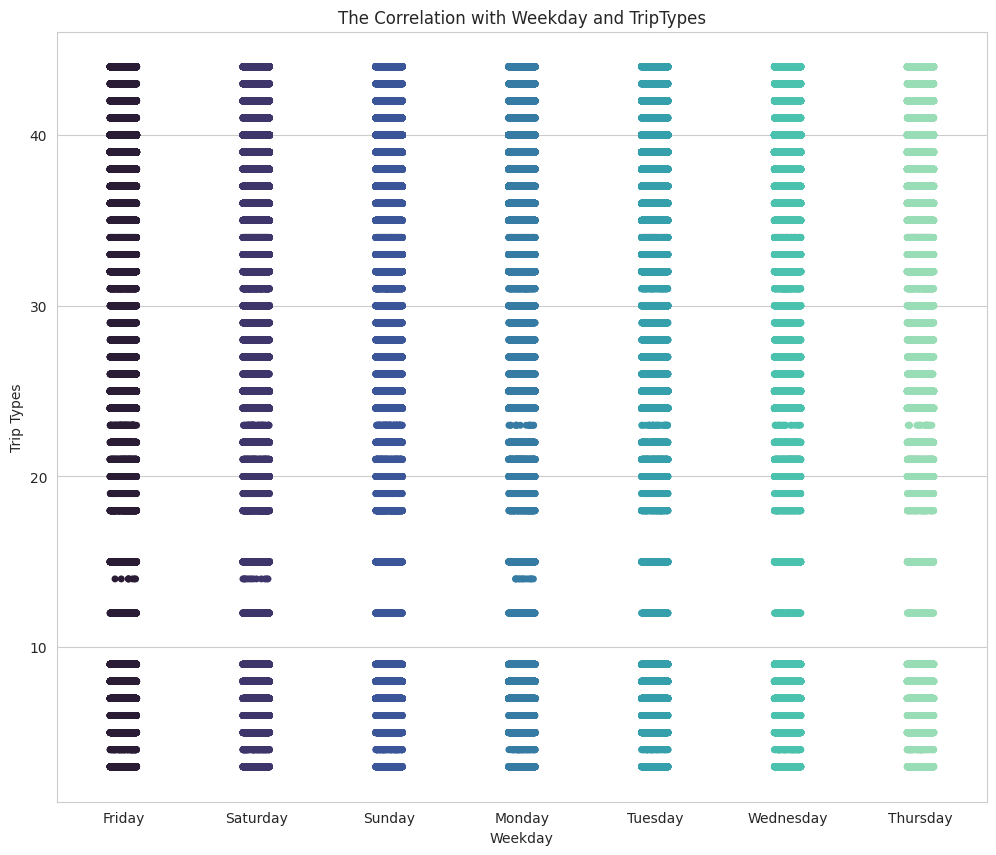

In [61]:
plt.figure(figsize = (12, 10))
sns.set_style('whitegrid')

ax3 = sns.stripplot(x = 'Weekday', y = 'TripType', data = data.loc[data['TripType'] < 999], palette = 'mako')
ax3.set(title = 'The Correlation with Weekday and TripTypes', xlabel = 'Weekday', ylabel = 'Trip Types')

Text(0, 0.5, 'FinelineNumber')

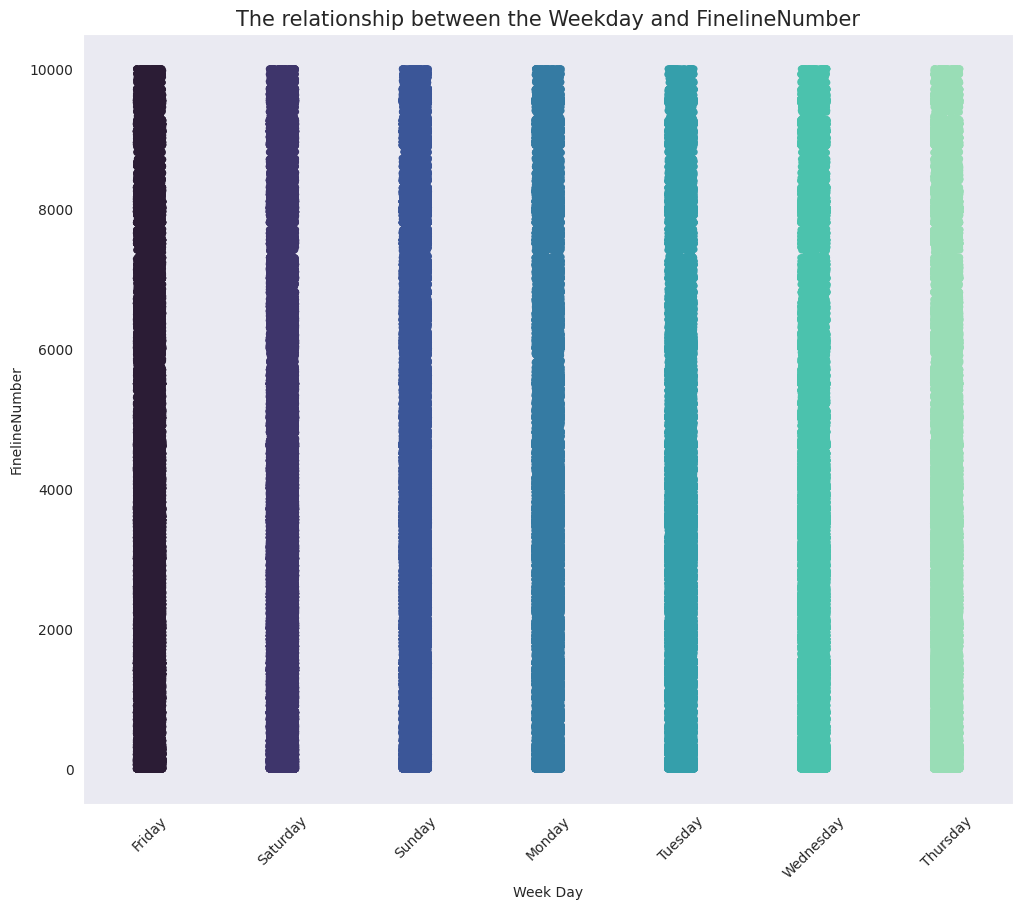

In [62]:
plt.figure(figsize = (12, 10))
sns.set_style('dark')

ax4 = sns.stripplot(x = 'Weekday', y = 'FinelineNumber', data = data, palette = 'mako')
# ax4.set(title = 'The relationship between the Weekday and FinelineNumber', xlabel = 'Week Day', ylabel = 'FinelineNumber')
plt.title('The relationship between the Weekday and FinelineNumber', fontsize = 15)
plt.xticks(rotation = 45)
plt.xlabel('Week Day')
plt.ylabel('FinelineNumber')

In [63]:
print('The unique of VisitNumber is {}'.format(data['VisitNumber'].nunique()))
data.DepartmentDescription.nunique()

The unique of VisitNumber is 95674


68

In [64]:
print('The missing data information'.center(50, '-'))
data.isnull().sum().sort_values(ascending = False)

-----------The missing data information-----------


,0
FinelineNumber,4129
DepartmentDescription,1361
TripType,0
Weekday,0
VisitNumber,0
ScanCount,0
company_code,0
product_code,0
Weekday_Friday,0
Weekday_Monday,0


In [65]:
data['DepartmentDescription'].fillna( 'None', inplace = True)

In [66]:
data['FinelineNumber'].fillna(data['FinelineNumber'].mean(), inplace = True)

In [67]:
data.isnull().sum().sort_values(ascending = False).to_frame()

,0
TripType,0
VisitNumber,0
Weekday,0
ScanCount,0
DepartmentDescription,0
FinelineNumber,0
company_code,0
product_code,0
Weekday_Friday,0
Weekday_Monday,0


In [68]:
tempData1 = pd.get_dummies(data[['DepartmentDescription']])
data = pd.concat([data, tempData1], axis = 1)

In [69]:
def deleteNan(datas):
    """
    Delete the 'nan' value of columns
    Parameters: datas is the data to delete.
    Return: cleaned data
    """
    datas == 'nan'
    datas = np.nan
    return datas

In [70]:
# columns = data.columns.tolist()
indexList = []
# columns = ['company_code', 'product_code']
columns = ['company_code']
for column in columns:
#     for index in range(data.shape[0]):
    indexList = data.loc[range(data.shape[0]), column] == 'nan'


In [71]:
data.loc[indexList, column] = '000000'


In [72]:
indexList.value_counts()


,count
company_code,
False,642925
True,4129


In [73]:
indexList = []
columns = ['product_code']
for column in columns:
    indexList = data.loc[range(data.shape[0]), column] == 'nan'


In [74]:
data.loc[indexList, column] = '000000'


In [75]:
data['company_code'].value_counts().sort_values(ascending = False)


,count
company_code,
787420,23889
681131,23357
605388,16218
787423,12266
490000,11890
...,...
846757,1
213312,1
413080,1


In [76]:
data[['product_code']].sample(10)


,product_code
441053,71990
630641,28020
169401,28610
124762,00113
150660,69410
158567,91321
591462,79770
111575,75070
439287,04263
387290,06085


In [77]:
data.loc[data['product_code'] == '', 'product_code'] = '00000'


In [78]:
data['product_code'].value_counts().sort_values(ascending = False).head()


,count
product_code,
00000,48242
62097,2501
51860,2074
51870,1891
00270,1602


In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 88 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   TripType                                           647054 non-null  int64   
 1   VisitNumber                                        647054 non-null  int64   
 2   Weekday                                            647054 non-null  object  
 3   ScanCount                                          647054 non-null  int64   
 4   DepartmentDescription                              647054 non-null  object  
 5   FinelineNumber                                     647054 non-null  float64 
 6   company_code                                       647054 non-null  object  
 7   product_code                                       647054 non-null  object  
 8   Weekday_Friday                                     647054 non-nu

In [80]:
objectData = data.select_dtypes(include = ['object', 'category']).head()

In [81]:
objectData.columns.tolist()

['Weekday',
 'DepartmentDescription',
 'company_code',
 'product_code',
 'number_ScanCount']

In [82]:
data.drop(['Weekday', 'DepartmentDescription','number_ScanCount'], axis = 1, inplace = True)


In [83]:
print('The data information'.center(50, '-') + '\n')
print(data.shape)
data.sample(3)


---------------The data information---------------

(647054, 85)


,TripType,VisitNumber,ScanCount,FinelineNumber,company_code,product_code,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
452238,39,134996,1,3717.0,787420,97280,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
244442,24,72439,1,3090.0,721406,33860,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59128,40,16872,1,1004.0,787424,35900,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
